In [ ]:
import zipfile
import pandas as pd
import seaborn as sns
import kagglehub
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')



c:\Users\Michelle\anaconda3\envs\credit_card_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Michelle\.cache\kagglehub\datasets\arjunbhasin2013\ccdata\versions\1


In [3]:
data= pd.read_csv("./CC GENERAL.csv")
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Descrição dos Dados

CUST_ID: Identificação do titular do cartão de crédito (categórica).

BALANCE: Saldo disponível na conta para realizar compras.

BALANCE_FREQUENCY: Frequência de atualização do saldo, variando entre 0 e 1 (1 = frequentemente atualizado, 0 = raramente atualizado).

PURCHASES: Valor total de compras realizadas.

ONEOFF_PURCHASES: Maior valor de compra realizado em uma única transação.

INSTALLMENTS_PURCHASES: Valor total de compras parceladas.

CASH_ADVANCE: Adiantamento de dinheiro feito pelo usuário.

PURCHASES_FREQUENCY: Frequência de compras realizadas, variando entre 0 e 1 (1 = frequentemente, 0 = raramente).

ONEOFF_PURCHASES_FREQUENCY: Frequência de compras realizadas em uma única transação (1 = frequentemente, 0 = raramente).

PURCHASES_INSTALLMENTS_FREQUENCY: Frequência de compras parceladas realizadas (1 = frequentemente, 0 = raramente).

CASH_ADVANCE_FREQUENCY: Frequência de adiantamentos de dinheiro realizados.

CASH_ADVANCE_TRX: Número de transações de adiantamento de dinheiro realizadas.

PURCHASES_TRX: Número de transações de compras realizadas.

CREDIT_LIMIT: Limite de crédito do cartão.

PAYMENTS: Valor total de pagamentos realizados pelo usuário.

MINIMUM_PAYMENTS: Valor mínimo de pagamentos realizados pelo usuário.

PRC_FULL_PAYMENT: Percentual de pagamentos realizados integralmente pelo usuário.

TENURE: Tempo de uso do cartão de crédito pelo usuário.

### Motivação

- O dataset envolve um problema relevante para o setor financerio que vive desafios em construir padrões de comportamentos dos clientes. A análise pode ajudar empresas a agrupar clientes com comportamentos semelhantes o que pode ajudar em estratégias de vários setores como produtos, marketing e gerenciamento.


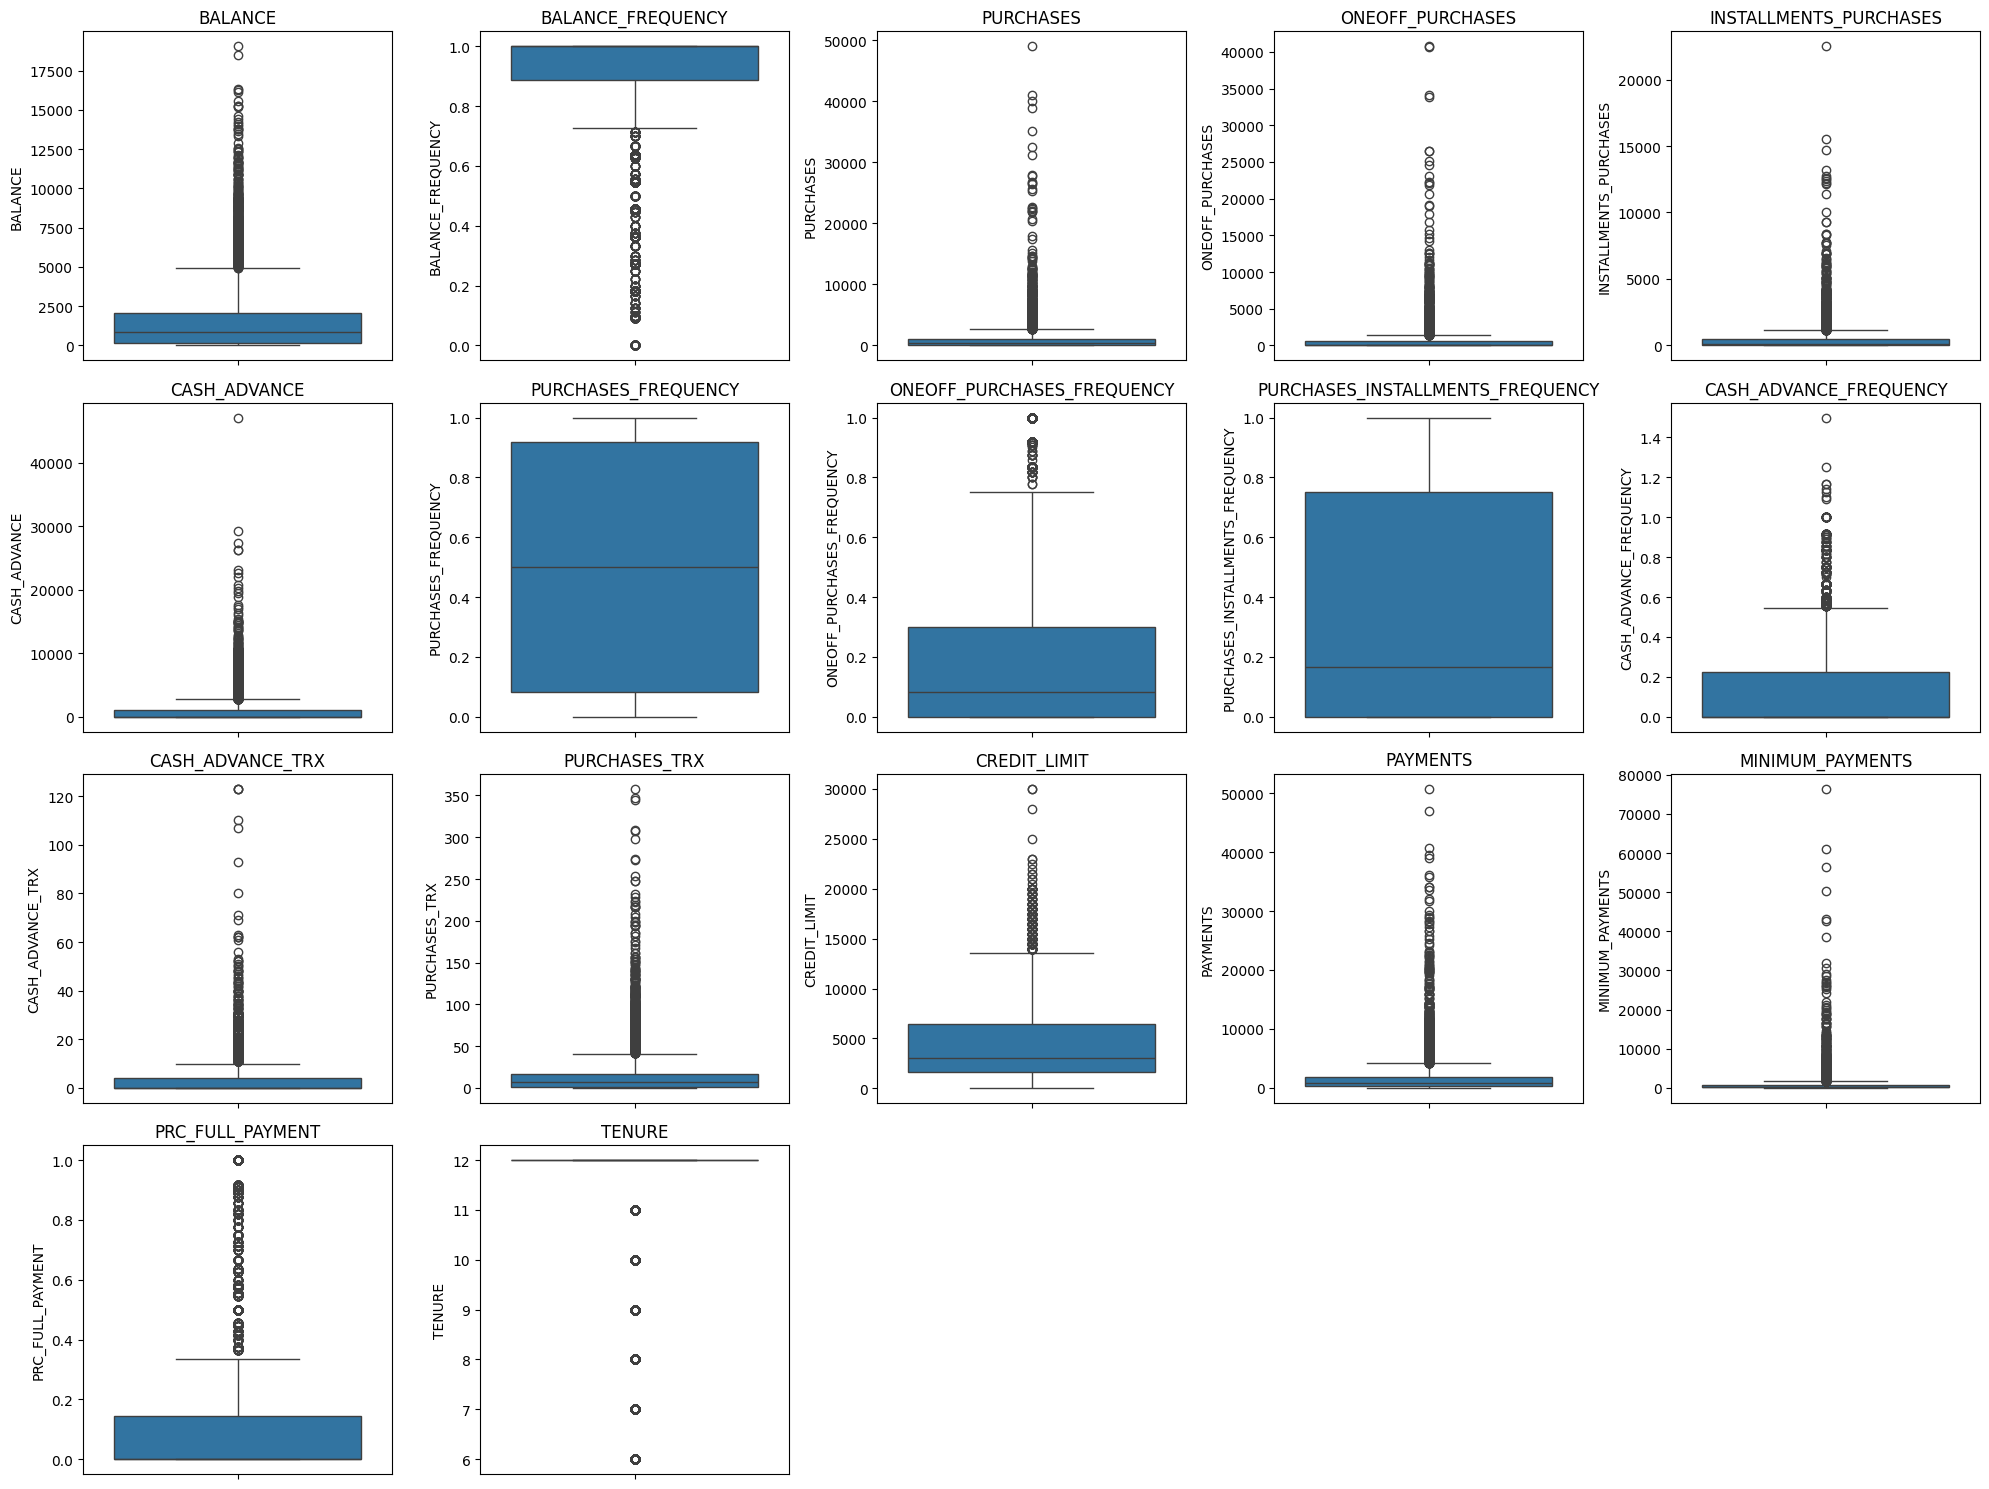

In [4]:
# Selecionando as variáveis para clusterização (excluindo ID e variáveis categóricas)
variables = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]
data_cluster = data[variables]
plt.figure(figsize=(20, 15))

for i, col in enumerate(variables, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=data_cluster, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

##### Análise dos Resultados
- BALANCE, PURCHASES, ONEOFF_PURCHASES, e CASH_ADVANCE apresentam valores assimétricos e com outliers evidentes.
- Algumas variáveis, como BALANCE_FREQUENCY, têm distribuição concentrada próxima a 1, sugerindo que a maioria dos clientes atualiza o saldo com frequência.
- Em quase todas as variáveis há outliers significativos 
- Variáveis como MINIMUM_PAYMENTS e CREDIT_LIMIT possuem valores que atingem escala alta (próxima a 70.000), enquanto outras, como PRC_FULL_PAYMENT, possuem valores entre 0 e 1.

##### O que deve ser feito com os dados antes da etapa de clusterização?
- Normalizar as variáveis
- Tratar outliers
- Aplicar transformações logarítmicas 

Etapas do Pré-processamento
Tratamento de Dados Ausentes:

Identificar colunas com dados ausentes e realizar as imputações adequadas.
Estratégias comuns:
Substituir por mediana para variáveis numéricas (mais robusta a outliers).
Tratamento de Outliers:

Identificar e tratar outliers presentes em variáveis com valores extremos.
Estratégias:
Transformação logarítmica para suavizar variáveis com grande assimetria.
Winsorization (limitando valores extremos).
Normalização das Variáveis:

Normalizar todas as variáveis para que estejam em uma escala comparável.
Uso do StandardScaler (média = 0, desvio padrão = 1) ou MinMaxScaler (valores entre 0 e 1).
Seleção de Variáveis:

Remover variáveis categóricas irrelevantes para o clustering (CUST_ID no caso).
Garantir que apenas variáveis numéricas relevantes estejam incluídas.
Transformação Logarítmica (Opcional):

Aplicar em variáveis muito assimétricas (ex.: PURCHASES, MINIMUM_PAYMENTS, etc.).
Geração de uma Nova Matriz de Correlação:

Confirmar se as variáveis após a transformação ainda possuem correlações relevantes.

In [5]:
from sklearn.impute import SimpleImputer

df = data.drop(columns=['CUST_ID'], axis=1)

#Tratar dados ausentes
imputer = SimpleImputer(strategy='median')  # Substituição pela mediana
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [6]:
# Tratamento de Outliers - Aplicando transformação logarítmica em variáveis selecionadas
cols_to_log = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
               'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for col in cols_to_log:
    df_imputed[col] = np.log1p(df_imputed[col]) 

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)


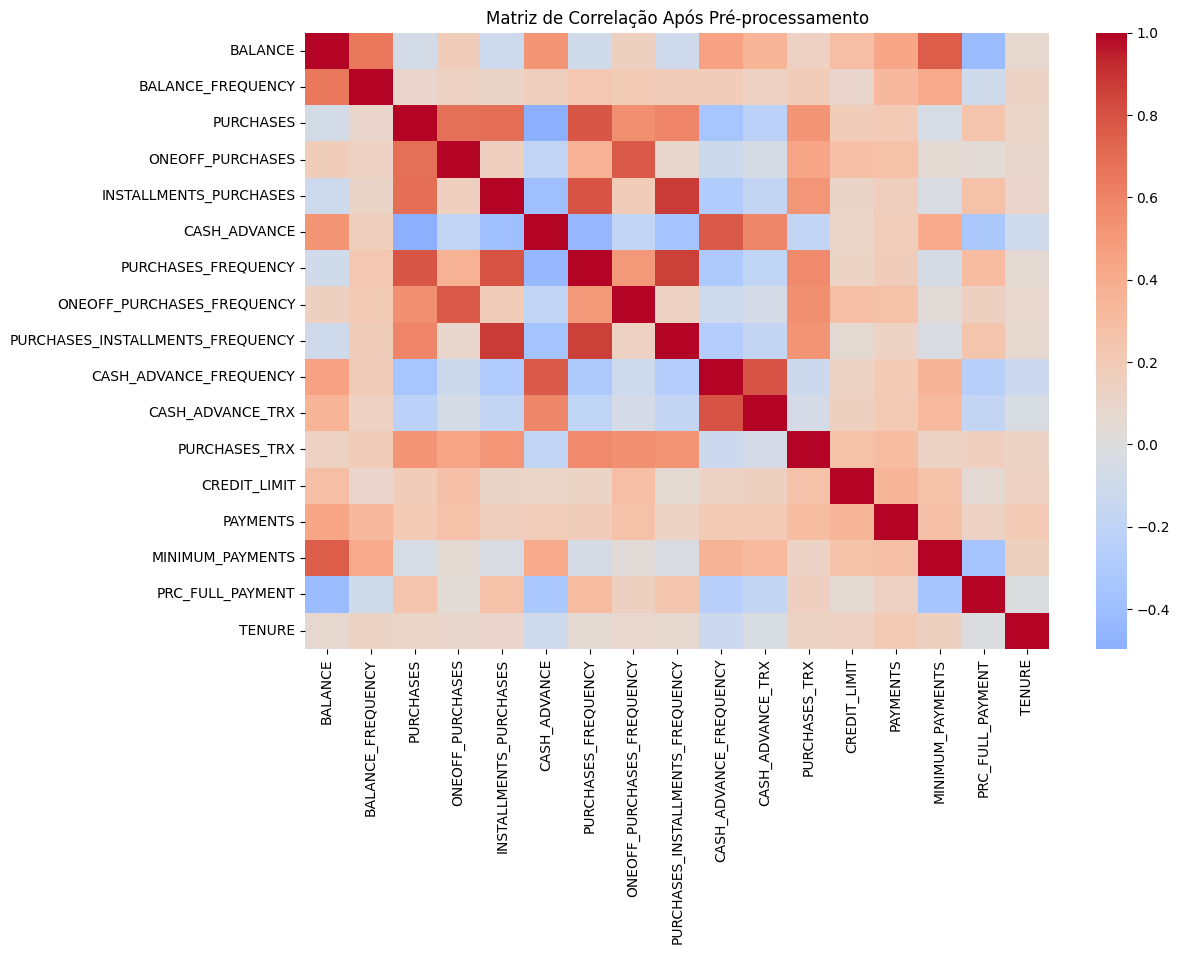

In [8]:
#Geração de Nova Matriz de Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df_normalized.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação Após Pré-processamento')
plt.show()

##### Análise de Matrix de Correlação após pré-processamento

- ONEOFF_PURCHASES e PURCHASES: Correlação forte e positiva, o que faz sentido, pois compras únicas contribuem diretamente para o total de compras.
- INSTALLMENTS_PURCHASES e PURCHASES: Assim como compras únicas, as compras parceladas também apresentam forte correlação com o total de compras.
- PURCHASES_TRX e PURCHASES: O número de transações de compras está positivamente correlacionado com o valor total de compras.
- CASH_ADVANCE e CASH_ADVANCE_TRX: Quantidade de adiantamento em dinheiro e número de transações têm forte correlação.
- BALANCE e PRC_FULL_PAYMENT: Relação negativa; quanto maior o saldo pendente, menor tende a ser o percentual de pagamentos integrais.
- CASH_ADVANCE_FREQUENCY: Possui uma baixa correlação com a maioria das variáveis, o que indica que o comportamento de adiantamentos em dinheiro pode ser um segmento isolado.

##### Variáveis Úteis para Clusterização
- BALANCE
- PURCHASES
- ONEOFF_PURCHASES
- INSTALLMENTS_PURCHASES
- CASH_ADVANCE
- PURCHASES_FREQUENCY
- PRC_FULL_PAYMENT

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_cols  = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
               'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT']
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized[cluster_cols])
    silhouette_avg = silhouette_score(df_normalized[cluster_cols], kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

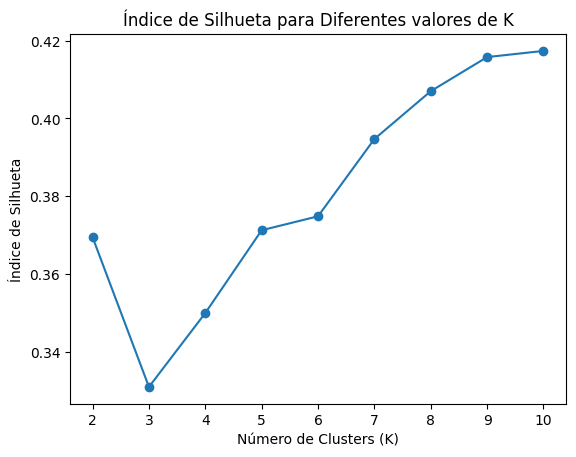

In [10]:
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Índice de Silhueta para Diferentes valores de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Índice de Silhueta")
plt.show()

In [11]:
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'O número ótimo de clusters (K) é: {optimal_k}')

O número ótimo de clusters (K) é: 10


In [12]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_normalized[cluster_cols])
df_imputed['KMeans_Cluster'] = kmeans.fit_predict(df_normalized[cluster_cols])
labels = kmeans.labels_
df['Cluster_KMeans'] = labels


Text(0, 0.5, 'PURCHASES')

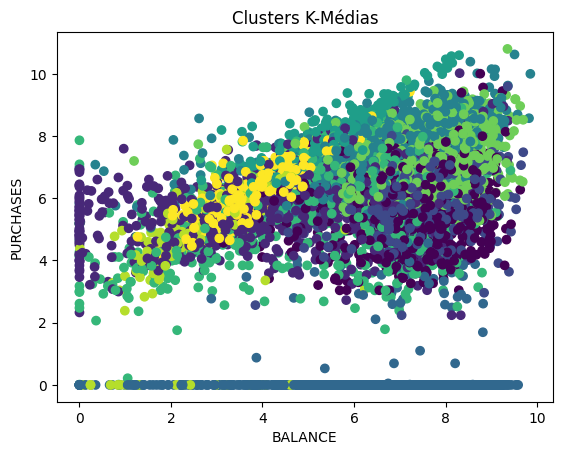

In [13]:

plt.scatter(df_imputed['BALANCE'], df_imputed['PURCHASES'], c=df_imputed['KMeans_Cluster'], cmap='viridis')
plt.title("Clusters K-Médias")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")


In [14]:
kmeans_cluster_summary = df.groupby('Cluster_KMeans')[cluster_cols].mean().reset_index()
print(kmeans_cluster_summary)

   Cluster_KMeans      BALANCE    PURCHASES  ONEOFF_PURCHASES  \
0               0  2383.863184   586.149255        574.621019   
1               1   561.808277   508.940050          1.770386   
2               2  2685.380649   558.213830          1.516812   
3               3  2168.824546     0.678702          0.081037   
4               4  1643.906666  2388.364358       1504.850585   
5               5   328.306943  3466.422312       2374.928367   
6               6   776.867113   581.829004        563.246455   
7               7  3030.240516  2004.099339       1208.253767   
8               8    33.893514   305.764964        130.874143   
9               9    78.589391   760.439470          0.698072   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  PRC_FULL_PAYMENT  
0               11.925342   2079.722488             0.236481          0.038031  
1              508.070830      0.367428             0.697513          0.068765  
2              557.382317   2077.583733  

##### Análise de Clusters

- Cluster 0: Clientes com um bom saldo de BALANCE (2383.86) e valor considerável de CASH_ADVANCE (2079.72), com compras variadas (PURCHASES de 586.15 e ONEOFF_PURCHASES de 574.62).

- Cluster 1: Clientes com BALANCE muito baixo (561.81) e compras regulares (PURCHASES de 508.94), mas sem grandes compras parceladas.

- Cluster 2: Clientes com um bom BALANCE (2685.38) e uma quantidade razoável de CASH_ADVANCE (2077.58), mas suas compras não são tão expressivas (PURCHASES de 558.21).

- Cluster 3: Clientes com um BALANCE considerável (2168.82), mas com compras muito baixas (PURCHASES de 0.68).

- Cluster 4: Este grupo tem um BALANCE médio de 1643.91, mas suas compras são muito mais altas (PURCHASES de 2388.36), sugerindo um comportamento de alto consumo.

- Cluster 5: Clientes com um BALANCE muito baixo (328.31) e compras expressivas (PURCHASES de 3466.42), destacando uma dependência de crédito.

- Cluster 6: Clientes com um BALANCE médio (776.87) e compras regulares (PURCHASES de 581.83).

- Cluster 7: Clientes com um bom BALANCE (3030.24) e boas compras (PURCHASES de 2004.10), provavelmente com bom comportamento financeiro.

- Cluster 8: Clientes com um BALANCE muito baixo (33.89) e compras também baixas (PURCHASES de 305.76), indicando um perfil com baixa utilização de crédito.

- Cluster 9: Clientes com BALANCE muito baixo (78.59) e compras médias (PURCHASES de 760.44), com baixos CASH_ADVANCE.

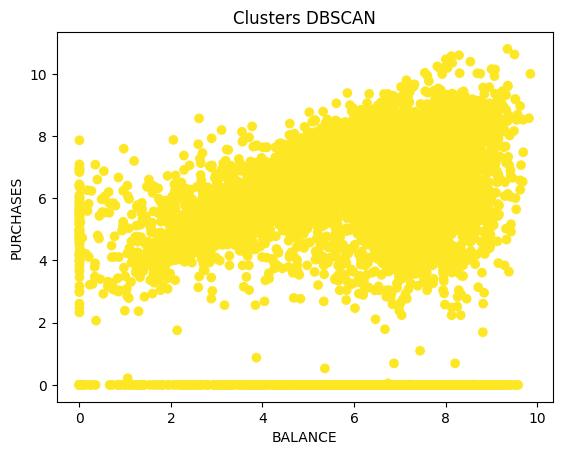

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_normalized[cluster_cols])
df_imputed['DBSCAN_Cluster'] = dbscan.fit_predict(df_normalized[cluster_cols])
labels = dbscan.labels_
df['DBSCAN_Cluster'] = labels


# DBSCAN
plt.scatter(df_imputed['BALANCE'], df_imputed['PURCHASES'], c=df_imputed['DBSCAN_Cluster'], cmap='viridis')
plt.title("Clusters DBSCAN")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")

plt.show()


In [16]:
dbscan_cluster_summary = df.groupby('DBSCAN_Cluster')[cluster_cols].mean().reset_index()
print(dbscan_cluster_summary)

   DBSCAN_Cluster      BALANCE    PURCHASES  ONEOFF_PURCHASES  \
0              -1   175.930384   264.980000          0.000000   
1               0  1564.629990  1003.287326        592.503572   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  PRC_FULL_PAYMENT  
0              264.980000   1556.629433             0.222222           1.00000  
1              411.083969    978.806551             0.490381           0.15362  


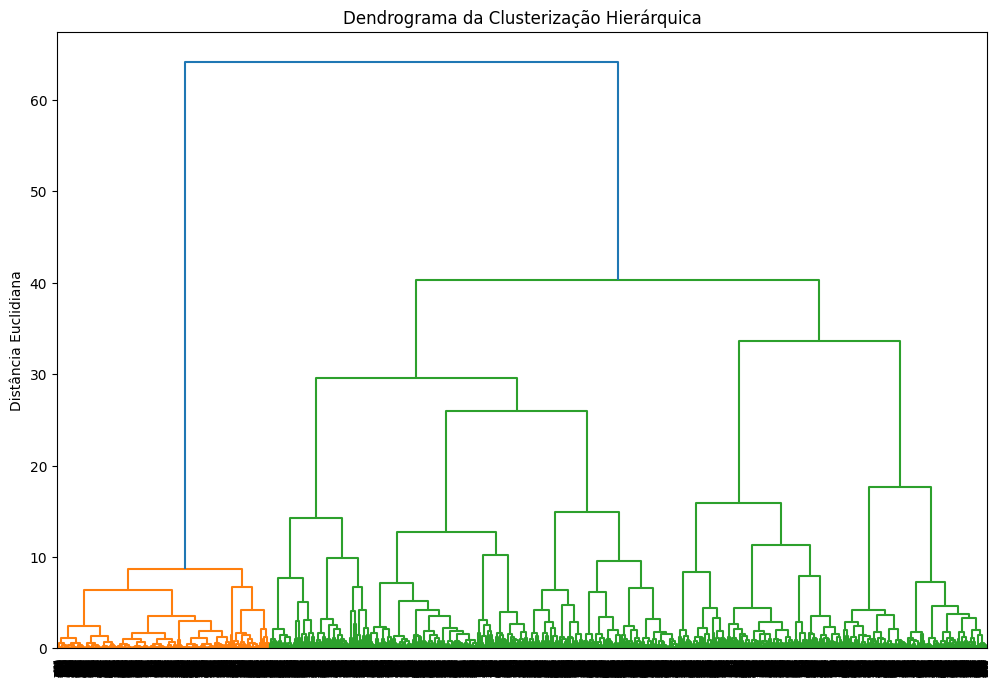

In [17]:
import scipy.cluster.hierarchy as sch

# Clusterização hierárquica
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(df_normalized[cluster_cols], method='ward'))
plt.title('Dendrograma da Clusterização Hierárquica')
plt.ylabel('Distância Euclidiana')
plt.show()

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste esses parâmetros conforme necessário
df_imputed['DBSCAN_Cluster'] = dbscan.fit_predict(df_normalized[cluster_cols])


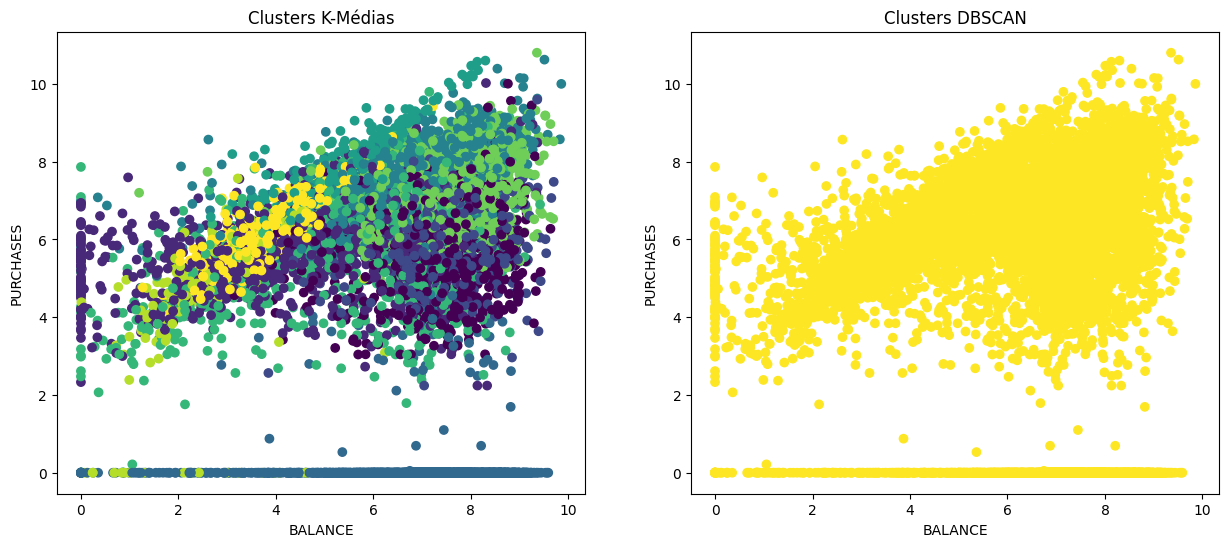

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# K-Médias
ax[0].scatter(df_imputed['BALANCE'], df_imputed['PURCHASES'], c=df_imputed['KMeans_Cluster'], cmap='viridis')
ax[0].set_title("Clusters K-Médias")
ax[0].set_xlabel("BALANCE")
ax[0].set_ylabel("PURCHASES")

# DBSCAN
ax[1].scatter(df_imputed['BALANCE'], df_imputed['PURCHASES'], c=df_imputed['DBSCAN_Cluster'], cmap='viridis')
ax[1].set_title("Clusters DBSCAN")
ax[1].set_xlabel("BALANCE")
ax[1].set_ylabel("PURCHASES")

plt.show()

Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

- Semelhança
    - Ambas as técnicas foram capazes de identificar padrões e realizar o agrupamento dos dados;
    - Tanto o K-Médias quanto o DBSCAN levaram em conta métricas para agrupar os dados. O K-Médias otimizou o índice de silhueta, enquanto o DBSCAN agrupou pontos com base na densidade e na distância entre vizinhos;
    - Ambos os métodos identificaram grupos de clientes com comportamentos semelhantes em termos de saldo, frequência de compras e adiantamento de dinheiro;

- Diferençaças
    - Número de Clusters;
    - Método de Agrupamento
        - K-Médias: Realiza agrupamento com base na minimização da soma das distâncias quadráticas entre os pontos e os centróides dos clusters;
        - DBSCAN: Baseia-se em densidade local, agrupando pontos densamente conectados e tratando pontos esparsos como ruído;

O K-Médias é mais adequado para conjuntos de dados onde os clusters são bem definidos e aproximadamente esféricos. A divisão em 10 grupos proporcionou uma boa separação entre clusters, como evidenciado pelo índice de silhueta.
O DBSCAN, ao classificar pontos dispersos como ruído, destacou a existência de áreas menos densas nos dados. Isso é útil para identificar outliers ou segmentos com menor representatividade.

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(data, labels):
    unique_clusters = np.unique(labels)
    distances_within = []
    distances_between = []

    # Distâncias internas aos clusters
    for cluster in unique_clusters:
        cluster_points = data[labels == cluster]
        if len(cluster_points) > 1:
            intra_distances = cdist(cluster_points, cluster_points, metric='euclidean')
            distances_within.append(np.max(intra_distances))

    # Distâncias entre clusters
    for i, cluster_i in enumerate(unique_clusters):
        for j, cluster_j in enumerate(unique_clusters):
            if i < j:
                points_i = data[labels == cluster_i]
                points_j = data[labels == cluster_j]
                inter_distances = cdist(points_i, points_j, metric='euclidean')
                distances_between.append(np.min(inter_distances))

    # Calcular índice de Dunn
    return np.min(distances_between) / np.max(distances_within)






In [21]:
from sklearn.metrics import calinski_harabasz_score
# from dunn_index import dunn_index  

# Para K-Means
kmeans_labels = kmeans.labels_
ch_score_kmeans = calinski_harabasz_score(data[cluster_cols], kmeans_labels)

# Para DBSCAN
dbscan_labels = dbscan.labels_
ch_score_dbscan = calinski_harabasz_score(data[cluster_cols], dbscan_labels)

# # Dunn Index
dunn_index_kmeans = dunn_index(data[cluster_cols], kmeans_labels)
dunn_index_dbscan = dunn_index(data[cluster_cols], dbscan_labels)

# Exibir resultados
print("K-Means:")
print(f"Índice de Silhueta: {silhouette_scores}")
print(f"Índice de Calinski-Harabasz: {ch_score_kmeans}")
print(f"Índice de Dunn: {dunn_index_kmeans}")

print("\nDBSCAN:")
print(f"Índice de Calinski-Harabasz: {ch_score_dbscan}")
print(f"Índice de Dunn: {dunn_index_dbscan}")


K-Means:
Índice de Silhueta: [np.float64(0.36945500193163694), np.float64(0.33097722581669814), np.float64(0.34997894695880294), np.float64(0.37125415806344586), np.float64(0.37483869511002244), np.float64(0.39470281069582513), np.float64(0.4070016284635837), np.float64(0.415768033421834), np.float64(0.4173520546133643)]
Índice de Calinski-Harabasz: 278.9956007924416
Índice de Dunn: 6.949059250337003e-06

DBSCAN:
Índice de Calinski-Harabasz: 0.18846417380417707
Índice de Dunn: 0.004319503125499752


K-Means
- Índice de Silhueta:
    - Varia entre 0.33 e 0.41, com o melhor valor obtido para 9 clusters (0.417). Valores moderados indicam que os clusters possuem separação razoável, mas não ótima.

- Índice de Calinski-Harabasz:
    - 278.996: Alto valor, sugerindo clusters bem definidos com boa separação interclusters e boa compactação interna.

- Índice de Dunn:
    - 6.95e-06: Muito baixo, indicando que os clusters têm baixa separação e podem estar sobrepostos. Isso sugere uma limitação do índice para capturar a real qualidade dos clusters no contexto do K-Means.

DBSCAN
- Índice de Calinski-Harabasz:
    - 0.188: Um valor extremamente baixo, refletindo uma baixa qualidade dos clusters gerados. Isso pode ser devido à natureza do DBSCAN, que não exige a formação de clusters compactos e pode identificar ruídos.

- Índice de Dunn:
    - 0.0043: Comparativamente melhor que o K-Means, sugerindo que os clusters do DBSCAN têm melhor separação relativa entre os pontos extremos e o centro dos clusters.

Comparação Geral
- Índice de Silhueta:
Aplica-se somente ao K-Means. O índice favorece clusters mais compactos e bem separados, indicando que 10 clusters é a configuração mais adequada.

- Índice de Calinski-Harabasz:
O K-Means apresenta um desempenho muito superior ao DBSCAN. Isso ocorre porque o índice avalia a dispersão entre clusters em relação à dispersão interna, e o DBSCAN, por definição, tende a formar clusters menos compactos.

- Índice de Dunn:
O DBSCAN obteve um valor melhor, possivelmente devido à maneira como o algoritmo separa pontos densos. Já o K-Means apresentou um índice extremamente baixo, sugerindo menor separação relativa entre clusters.

Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

1. Pré-processamento de dados
    - Tratar dados faltantes, se houver;
    - Normalizar séries se necessário;
    - Garantir que estejam na mesma frequência de amostragem;
2. Calcular matriz de similaridade
    - Calcular correlação cruzada entre cada par;
    - Armazenar o valor máximo da correlação cruzada;
    - Criar matrix simétrica com os valores;
3. Definir Métrica de Distância
    - Converter valrores de correlação em distância;
4. Aplicar algoritmo de agrupamento
    - Escolher método de clustering hierarquico ou k-means;
    - Definir o número de grupos igual a 3 (k=3);
    - Executar o algoritmo usando a matriz de distância;
5. Validar os grupos formados
    - Calcular métricas de validação interna;
    - Verificar coesão dentro dos grupos;
    - Avaliar separação;
6. Análise dos Resultados
    - Visualizar grupos formados;
    - Identificar características em comum de cada grupo;
    - Validar se o agrupamento faz sentido;
7. Realizar ajustes
    - Experimentar outros métodos de clustering;
    - Ajustar parâmetros caso necessário;
8. Visualização dos Resultados
    - Plotar séries temporais para visualizar o comportamento dos grupos ao longo do tempo;

Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

O algoritmo indicado seria o de Clusterização Hierárquica.

    - O algoritmo de clusterização hierárquica trabalha bem com matrizes de similaridade, como a matriz de correlação cruzada, pois ele não requer a definição prévia do número de clusters;
    - Fornece uma visualização hierárquica (dendrograma) que permite analisar a estrutura de agrupamento em diferentes níveis, validar visualmente a qualidade dos 3 grupos propostos e identificar possíveis subgrupos dentro dos grupos principais;
    - É computacionalmente viável para 10 séries, sendo mais robusto e menos sensível a pré-definição de clusteres, oferecendo uma abordagem mais natural para um número pequeno de séries.

Indique um caso de uso para essa solução projetada.

CASO DE USO: Análise de Padrões de Consumo de Energia em Indústrias

- Contexto
    - Uma concessionária de energia monitora 10 grandes indústrias e cada indústria possui medição horária de consumo de energia ao longo de um ano.
    - Essa industria possui a necessidade de otimizar tarifas e identificar perfis similares de consumo
- Benefícios do Agrupamento:
    - Grupo 1: Indústrias com consumo intenso durante o dia
    - Grupo 2: Indústrias com consumo noturno
    - Grupo 3: Indústrias com consumo irregular/sazonal
- Aplicações Práticas:
    - Desenvolvimento de tarifas específicas por grupo
    - Planejamento de manutenção preventiva
    - Otimização da distribuição de carga
    - Programas de eficiência energética direcionados

Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

    - Dynamic Time Warping (DTW)
    1. Pré-processamento:
    2. Cálculo da matriz de custo
        - Criar matriz M[n,m] onde n e m são os comprimentos das séries
        - Calcular distância entre cada par de pontos
        - Preencher a matriz com custos acumulados
        - Aplicar restrições de warping (janela de Sakoe-Chiba ou Itakura)
    3. Encontrar o caminho ótimo:
        - Identificar o caminho que minimiza a distância total
        - Aplicar programação dinâmica
        - Registrar o custo total do alinhamento
    4. Construção da matriz de similaridade:
    5. Aplicação do clustering:
        - Usar a matriz de distância DTW
        - Aplicar algoritmo hierárquico
        - Definir número de clusters (3)
    6. Validação
    7. Análise e Interpretação dos Resultados



